<a href="https://colab.research.google.com/github/hamzafar/stable_diffusion_models/blob/main/Explaining_stable_diffusion_with_dreambooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> > > > > 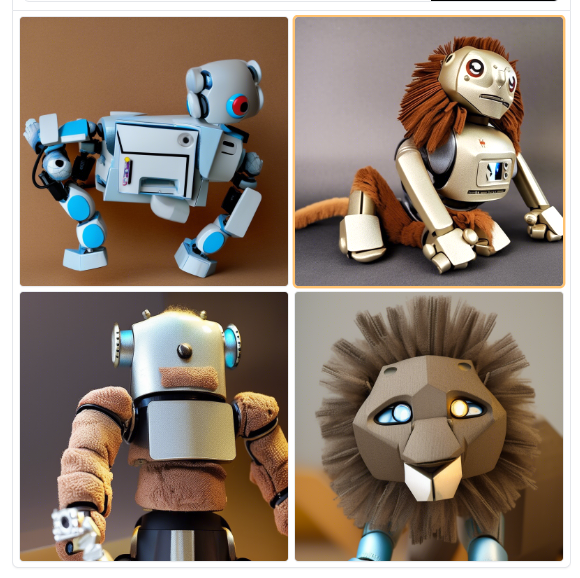

There are many resources for training stable diffusion online however I identified hugging face is the simplest one. And their github implementation can be found on the following link: https://github.com/huggingface/diffusers.

In this notebook I will explain:
> 1. Setup/configure stable diffusion on colab
> 2. Finetune Stable diffusion with dreambooth
> 3. Finetune Stable diffusion with dreambooth prior-preservation loss
> 4. Results


# 1- Setup/configure stable diffusion
---

##1.1.1- Register and get token

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please refer to the following link: https://decentralizedcreator.com/get-access-token-in-hugging-face/ 

In [ ]:
!pip install huggingface_hub
!huggingface-cli login
!git config --global credential.helper store


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 32.3 MB/s 

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might h

##1.1.2- Accept License for the Model

Before using the model, you need to accept the model license in order to download and use the weights: https://huggingface.co/CompVis/stable-diffusion-v1-4


##1.2- Clone Repository

In [ ]:
!git clone https://github.com/huggingface/diffusers


Cloning into 'diffusers'...
remote: Enumerating objects: 15120, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 15120 (delta 44), reused 47 (delta 25), pack-reused 15036
Receiving objects: 100% (15120/15120), 10.26 MiB | 31.46 MiB/s, done.
Resolving deltas: 100% (10416/10416), done.


##1.3- Install Dependencies

In [ ]:
%cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:
!pip install diffusers["torch"] transformers
!pip install bitsandbytes
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 503 kB 33.9 MB/s 
     |████████████████████████████████| 5.8 MB 68.4 MB/s 
     |████████████████████████████████| 7.6 MB 54.9 MB/s 
     |████████████████████████████████| 191 kB 77.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.5 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 6.0 MB 64.3 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

## 1.4- Configure Accelerate

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

#2- Finetune Stable diffusion with dreambooth
---

## 2.1 - Data
I have taken pictures of my kid robot toy. The images are taken from different sides and different background. To use these images for model training, I have:
> * Create folder at colab 
> * Upload data from the local directory

## 2.2- Training


Once the installation and configuraiton is done you're ready to train by running the train_dreambooth.py script with a few extra arguments


>>*  --pretrained_model_name_or_path - path of stable diffusion model
*  --instance_data_dir  - path of images data
*  --output_dir - path for saving trained model
*  --instance_prompt - input text
*  --resolution - resolution of image 
*  --train_batch_size - batch size of data  
*  --gradient_accumulation_steps - gradient step
*  --learning_rate - learning rate for training
*  --lr_scheduler - learnging rate scheduler  
*  --lr_warmup_steps - learning rate warmup steps  
*  --max_train_steps - maximum tranining steps(run)  
*  --use_8bit_adam - 8 bit adam optimizer







In [ ]:
%%shell
export MODEL_NAME="CompVis/stable-diffusion-v1-4"
export INSTANCE_DIR="/content/robot"
export OUTPUT_DIR="/content/sd_dreamboth"

accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a robot-toy" \
  --resolution=256 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=20 \
  --use_8bit_adam

Downloading: 100% 806/806 [00:00<00:00, 192kB/s]
Downloading: 100% 1.06M/1.06M [00:00<00:00, 19.5MB/s]
Downloading: 100% 525k/525k [00:00<00:00, 24.8MB/s]
Downloading: 100% 472/472 [00:00<00:00, 819kB/s]
Downloading: 100% 592/592 [00:00<00:00, 964kB/s]
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Downloading: 100% 492M/492M [00:05<00:00, 90.4MB/s]
Downloading: 100% 335M/335M [00:03<00:00, 102MB/s]
Downloading: 100% 522/522 [00:00<00:00, 871kB/s]
Downloading: 100% 3.44G/3.44G [00:54<00:00, 63.4MB/s]
Downloading: 100% 743/743 [00:00<00:00, 1.16MB/s]
Downloading: 100% 313/313 [00:00<00:00, 323kB/s]
Steps: 100% 20/20 [00:19<00:00,  1.87it/s, loss=0.149, lr=2e-6]
Downloading: 100% 543/543 [00:00<00:00, 541kB/s]

Fetching 16 files:   0% 0/16 [00:00<?, ?it/s]

Downloading: 100% 342/342 [00:00<00:00, 357kB/s]


Downloading: 100% 4.56k/4.56k [00:00<00:00, 4.73MB/s]

Fetching 16 files: 

# 3- Finetune Stable diffusion with dreambooth prior-preservation loss
---

## 3.1- Prior-Preservation Loss
>* Prior-preservation is used to avoid overfitting and language-drift. 
* Generate images from the model with the class prompt
* Ideally 200-300 images are recommended (single class)
* We will use the above trained model and produce 50 images for tutorial purpose
>> * Save them in the folder






In [ ]:
import torch
from PIL import Image, ImageFont, ImageDraw 
from diffusers import StableDiffusionPipeline


In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    # torch_dtype=torch.float16,
)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
pipe = pipe.to("cuda")

In [ ]:
prompt = "a robot toy"

In [ ]:
for i in range(0, 5):
  pth='/content/class_data/'+str(i+1)+'.jpeg'
  image = pipe(prompt).images[0]
  image.save(pth)
  # display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
pipe.to('cpu')
del pipe
torch.cuda.empty_cache()

##3.2- Class and Instance

In training stable diffusion, There are two concepts class and instance.
> * **Class:** Generic category i.e animal
> * **Instance:** Sub category i.e. cat

##3.3- Training
>* Similar parameters to pervious training
>* Following new parameters are added

>>* --class_prompt - text prompt for class  
* --instance_prompt - text prompt for instance
* --with_prior_preservation - indicator for prior preservation 
* --prior_loss_weight - weight for prior loss





In [ ]:
%%shell
export MODEL_NAME="CompVis/stable-diffusion-v1-4"
export INSTANCE_DIR="/content/robot"
export CLASS_DIR="/content/class_data"
export OUTPUT_DIR="/content/sd_dreamboth_proiorloss"

accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a [V] robot toy" \
  --class_prompt="a robot toy" \
  --resolution=256 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 --gradient_checkpointing \
  --use_8bit_adam \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=5 \
  --max_train_steps=20

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Steps: 100% 20/20 [00:32<00:00,  1.36s/it, loss=0.995, lr=2e-6]
Fetching 16 files: 100% 16/16 [00:00<00:00, 7518.36it/s]
Steps: 100% 20/20 [01:01<00:00,  3.10s/it, loss=0.995, lr=2e-6]


#4- Results
---

> * Load the prior-preservation loss in sd pipeline
> * Use some prompt
> * Generate images 



In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "/content/sd_dreamboth_proiorloss", 
    
)

In [ ]:
pipe = pipe.to("cuda")

In [ ]:
prompt = " An image of [V] robot toy holding gun"

  0%|          | 0/50 [00:00<?, ?it/s]

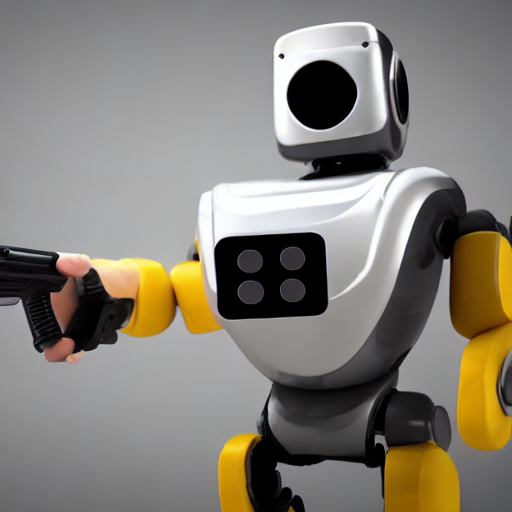

  0%|          | 0/50 [00:00<?, ?it/s]

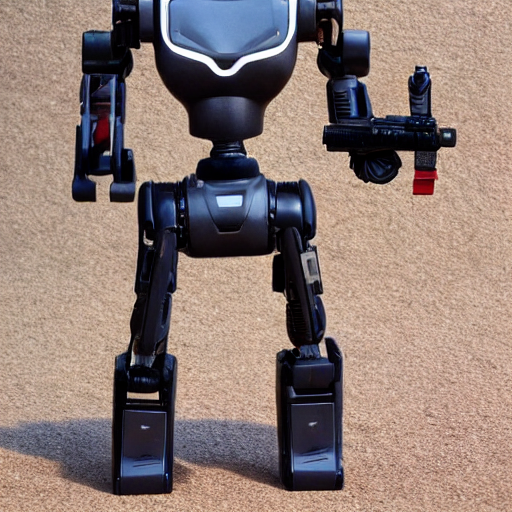

  0%|          | 0/50 [00:00<?, ?it/s]

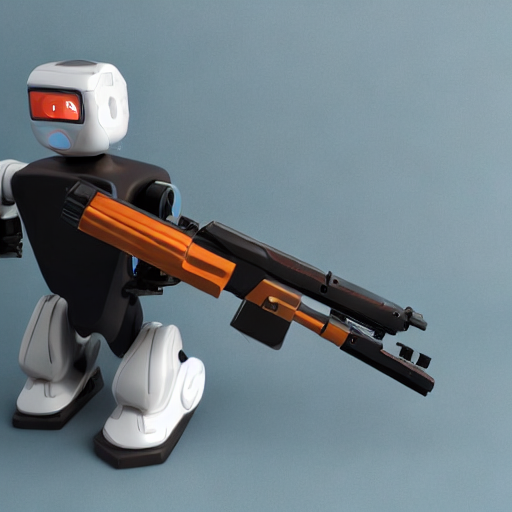

  0%|          | 0/50 [00:00<?, ?it/s]

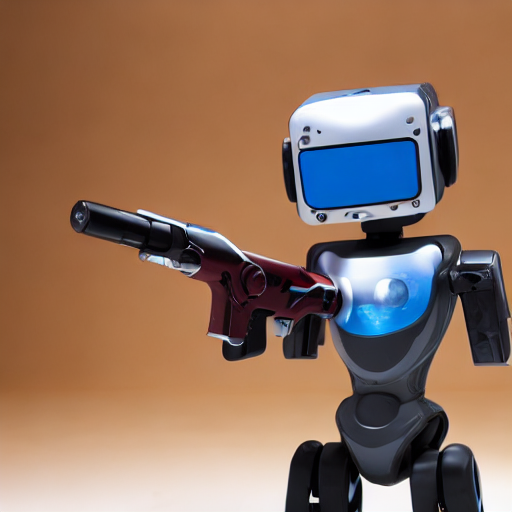

  0%|          | 0/50 [00:00<?, ?it/s]

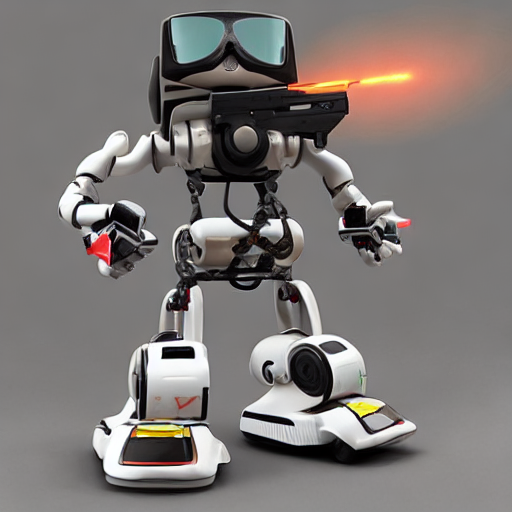

In [ ]:
for i in range(0,2):
  image = pipe(prompt).images[0]
  display(image)

In [ ]:
pipe.to('cpu')
del pipe
torch.cuda.empty_cache()